## Copyright Note


**This lecture mainly examples are adapted from wiki and internet resources and the below refernce (Chapter 15).

## [Link 1](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)
 

## Deep Learning Reference

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book**: Deep Learning with Python by Francois Chollet (2018)[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)


### [A Useful paper](https://www.deeplearningbook.org/contents/rnn.html)






## Learning concepts:

1. Types of RNNs:
  -  [Video 1](https://www.youtube.com/watch?v=EzsXi4WzelI)
  -  [Video 2](https://www.youtube.com/watch?v=_aCuOwF1ZjU)
2. Traditional RNN.  
3. Examples of simple and Deep RNN for time-series analysis.
  - One timestep to predict one timestep ahead.
  - One timestep to predict multiple-timesteps ahead.
4. RNN modern architecture.

## Architecture of traditional RNN

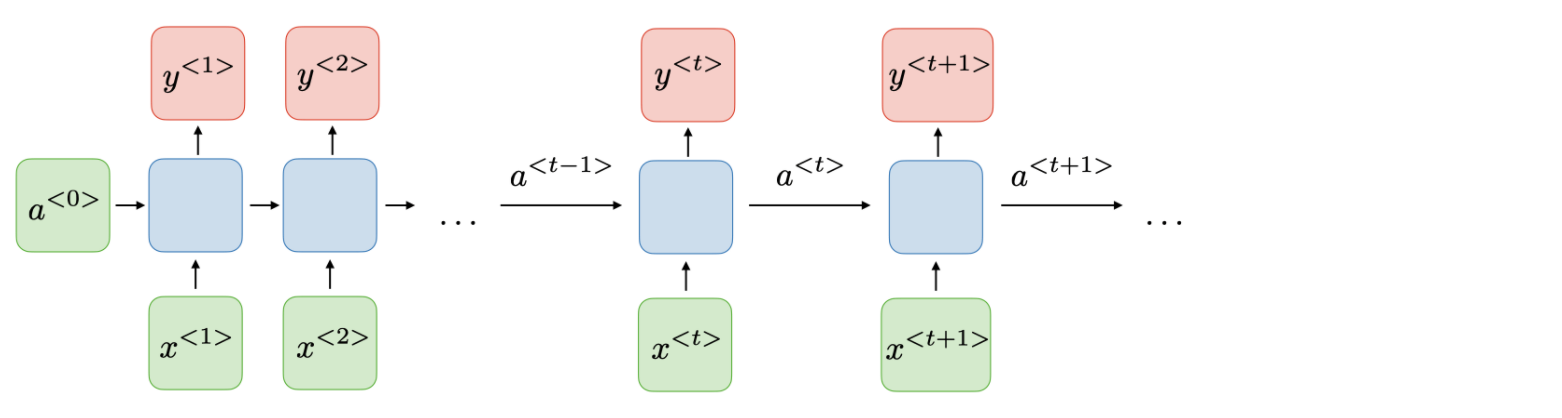



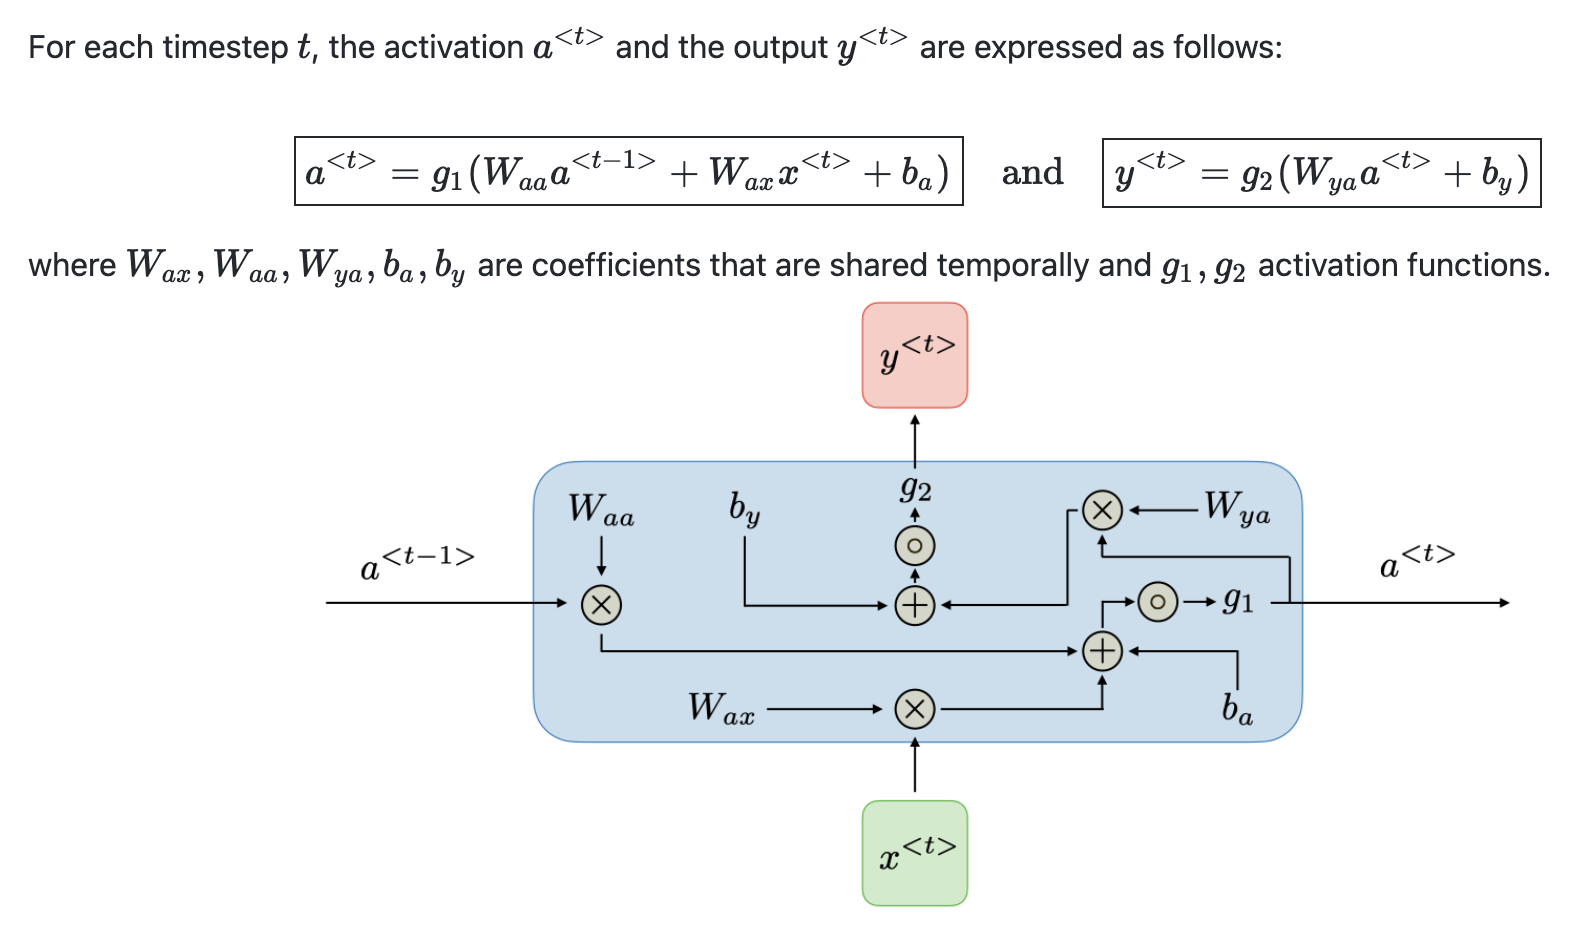

## Pros:
     -   Possibility of processing input of any length.
     -   Model size not increasing with size of input.
     -   Computation takes into account historical information.
     -   Weights are shared across time.

## Cons:
     - Computation being slow.
     - Difficulty of accessing information from a long time ago.
     - Cannot consider any future input for the current state.
      

In [1]:
import sys
import os

import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from pathlib import Path

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Basic RNNs

In [2]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [3]:
a,b,c,d=np.random.rand(4, 10, 1)
print(a,b,c,d)

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]] [[0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]] [[0.61185289]
 [0.13949386]
 [0.29214465]
 [0.36636184]
 [0.45606998]
 [0.78517596]
 [0.19967378]
 [0.51423444]
 [0.59241457]
 [0.04645041]] [[0.60754485]
 [0.17052412]
 [0.06505159]
 [0.94888554]
 [0.96563203]
 [0.80839735]
 [0.30461377]
 [0.09767211]
 [0.68423303]
 [0.44015249]]


In [4]:
# Generate Data

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [8]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
print(series[1])
print(len(series[1]))
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

[[ 0.24511378]
 [ 0.23174433]
 [-0.00599396]
 [-0.14533305]
 [-0.31580353]
 [-0.4388943 ]
 [-0.5878479 ]
 [-0.5458042 ]
 [-0.44855034]
 [-0.24629089]
 [ 0.05897167]
 [ 0.25053233]
 [ 0.55114156]
 [ 0.6936512 ]
 [ 0.7185335 ]
 [ 0.5795115 ]
 [ 0.33066   ]
 [ 0.05455513]
 [-0.18695112]
 [-0.44431937]
 [-0.6402944 ]
 [-0.62540805]
 [-0.5477814 ]
 [-0.35062551]
 [-0.12485091]
 [ 0.14836453]
 [ 0.36808363]
 [ 0.42955294]
 [ 0.56634104]
 [ 0.4632922 ]
 [ 0.36384302]
 [ 0.2479538 ]
 [ 0.0744473 ]
 [-0.04693193]
 [-0.2069649 ]
 [-0.2809638 ]
 [-0.3494651 ]
 [-0.310967  ]
 [-0.26699314]
 [-0.2730748 ]
 [-0.20220686]
 [-0.15053852]
 [ 0.0040438 ]
 [ 0.05242047]
 [ 0.246249  ]
 [ 0.33387238]
 [ 0.3869871 ]
 [ 0.49712527]
 [ 0.41383964]
 [ 0.2979726 ]
 [ 0.11629631]]
51


In [ ]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

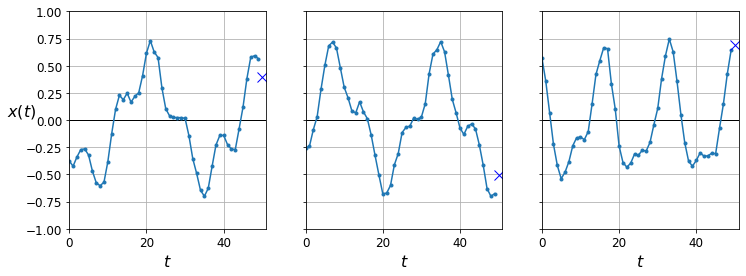

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

## Using a Simple RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 8s 33ms/step - loss: 0.1554 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0409 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0277 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0208 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0174 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0117 - val_lo

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0109


0.010881561785936356

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

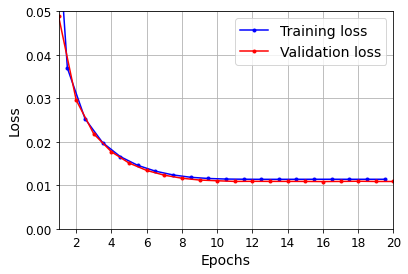

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

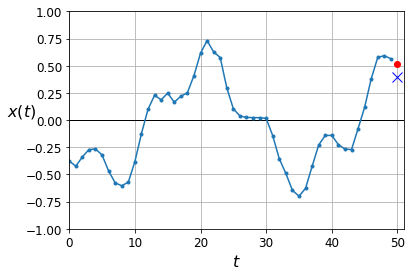

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Using a Deep RNN

In [ ]:
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 24s 101ms/step - loss: 0.1324 - val_loss: 0.0090
Epoch 2/20
219/219 [==============================] - 21s 97ms/step - loss: 0.0078 - val_loss: 0.0065
Epoch 3/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 4/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 5/20
219/219 [==============================] - 21s 94ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 6/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/20
219/219 [==============================] - 21s 97ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 8/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 21s 94ms/step - loss:

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 1s 10ms/step - loss: 0.0029


0.002910560229793191

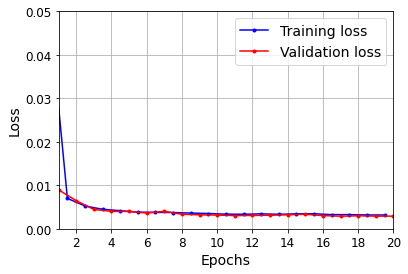

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

## Deep RNN with Batch Norm

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 24s 99ms/step - loss: 0.1456 - val_loss: 0.0983
Epoch 2/20
219/219 [==============================] - 21s 97ms/step - loss: 0.0128 - val_loss: 0.0273
Epoch 3/20
219/219 [==============================] - 21s 95ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 4/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 5/20
219/219 [==============================] - 20s 91ms/step - loss: 0.0066 - val_loss: 0.0087
Epoch 6/20
219/219 [==============================] - 21s 98ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 7/20
219/219 [==============================] - 22s 99ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 8/20
219/219 [==============================] - 22s 99ms/step - loss: 0.0057 - val_loss: 0.0049
Epoch 9/20
219/219 [==============================] - 20s 93ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 10/20
219/219 [==============================] - 20s 93ms/step - loss: 0.00

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 1s 10ms/step - loss: 0.0042


0.004192101303488016

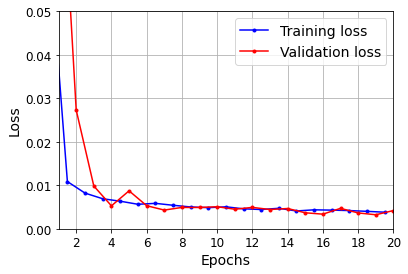

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

## Forecasting Several Steps Ahead

Now let's create an RNN that predicts the next 10 steps at each time step.  It will forecast time steps 1 to 10 at time step 0, then time steps 2 to 11 at time step 1, and so on, and finally it will forecast time steps 50 to 59 at the last time step. Notice that the model is causal: when it makes predictions at any time step, it can only see past time steps.

In [ ]:
n_steps = 50
Y = np.empty((10000, n_steps, 10))

In [ ]:
Y[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps,0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
Y_test[1]

array([[-0.50170362, -0.45471132, -0.36820066, -0.29434291, -0.14543545,
         0.0443013 ,  0.18725382,  0.37788573,  0.58263874,  0.66839898],
       [-0.45471132, -0.36820066, -0.29434291, -0.14543545,  0.0443013 ,
         0.18725382,  0.37788573,  0.58263874,  0.66839898,  0.67206633],
       [-0.36820066, -0.29434291, -0.14543545,  0.0443013 ,  0.18725382,
         0.37788573,  0.58263874,  0.66839898,  0.67206633,  0.72341931],
       [-0.29434291, -0.14543545,  0.0443013 ,  0.18725382,  0.37788573,
         0.58263874,  0.66839898,  0.67206633,  0.72341931,  0.54379934],
       [-0.14543545,  0.0443013 ,  0.18725382,  0.37788573,  0.58263874,
         0.66839898,  0.67206633,  0.72341931,  0.54379934,  0.43451643],
       [ 0.0443013 ,  0.18725382,  0.37788573,  0.58263874,  0.66839898,
         0.67206633,  0.72341931,  0.54379934,  0.43451643,  0.2507889 ],
       [ 0.18725382,  0.37788573,  0.58263874,  0.66839898,  0.67206633,
         0.72341931,  0.54379934,  0.43451643

In [ ]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 16s 67ms/step - loss: 0.0705 - last_time_step_mse: 0.0621 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 15s 67ms/step - loss: 0.0413 - last_time_step_mse: 0.0301 - val_loss: 0.0352 - val_last_time_step_mse: 0.0244
Epoch 3/20
219/219 [==============================] - 13s 61ms/step - loss: 0.0335 - last_time_step_mse: 0.0222 - val_loss: 0.0363 - val_last_time_step_mse: 0.0269
Epoch 4/20
219/219 [==============================] - 14s 63ms/step - loss: 0.0311 - last_time_step_mse: 0.0209 - val_loss: 0.0277 - val_last_time_step_mse: 0.0156
Epoch 5/20
219/219 [==============================] - 14s 64ms/step - loss: 0.0279 - last_time_step_mse: 0.0163 - val_loss: 0.0262 - val_last_time_step_mse: 0.0136
Epoch 6/20
219/219 [==============================] - 16s 72ms/step - loss: 0.0256 - last_time_step_mse: 0.0130 - val_loss: 0.0236 - val_last_time_step_mse: 0.0105
Epoch 7/20
219/2

In [ ]:

np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

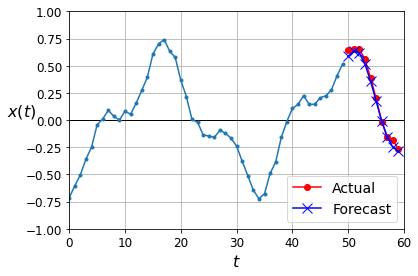

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## Types of Gates and RNN architectures

[Gated Recurrent Unit (GRU)](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) and [Long Short-Term Memory units (LSTM)](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) deal with the vanishing gradient problem encountered by traditional RNNs, with LSTM being a generalization of GRU.

-  Videos
   -  [LSTM](https://www.youtube.com/watch?v=LfnrRPFhkuY)
   -  [GRU](https://www.youtube.com/watch?v=tOuXgORsXJ4)

In order to remedy the vanishing gradient problem, specific gates are used in some types of RNNs and usually have a well-defined purpose. They are usually noted $\Gamma$ and are equal to:


$\Gamma =\sigma(Wx^{<t>}+Ua^{<t-1>}+b)$

where $W,U,b$ are cofficients to the gate and $\sigma$ is the sigmoid function. The main gates are summed as follows:

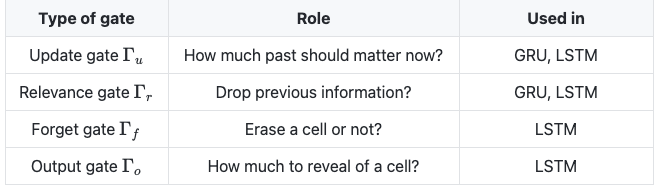



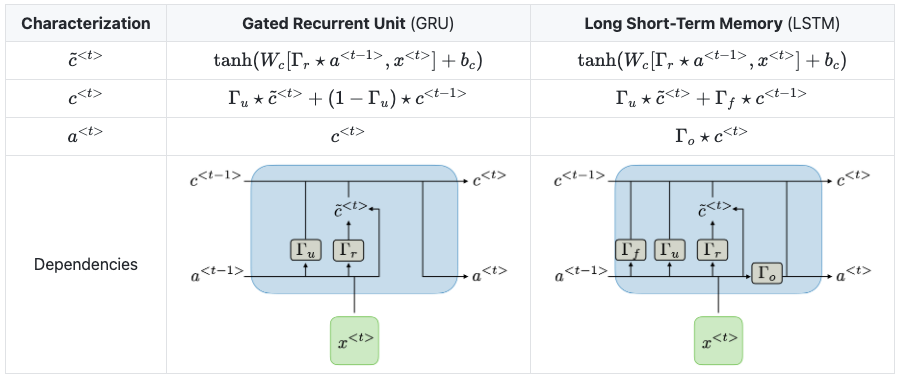